**Importar librerías**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Análisis del dataset**

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


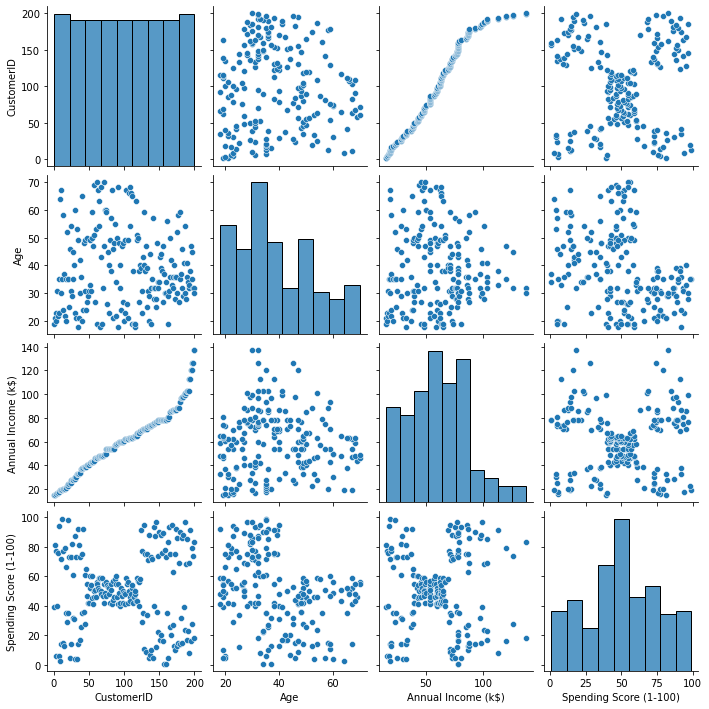

In [5]:
sns.pairplot(df)

**Mapa de correlaciones**

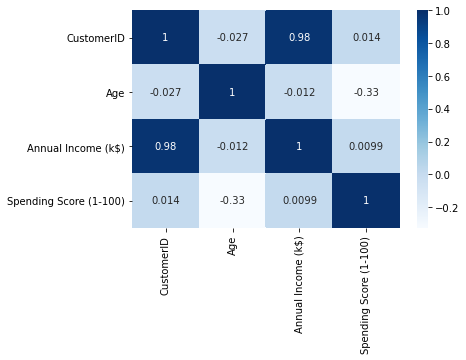

In [6]:
correl = df.corr()
sns.heatmap(correl, annot=True, cmap="Blues");

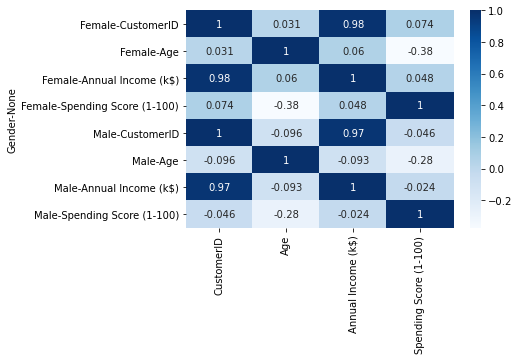

In [7]:
data2 = df.groupby('Gender')

sns.heatmap(data2[["CustomerID","Age","Annual Income (k$)","Spending Score (1-100)"]].corr(), annot=True, cmap="Blues");

**Análisis de las distribuciones estadísticas**

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

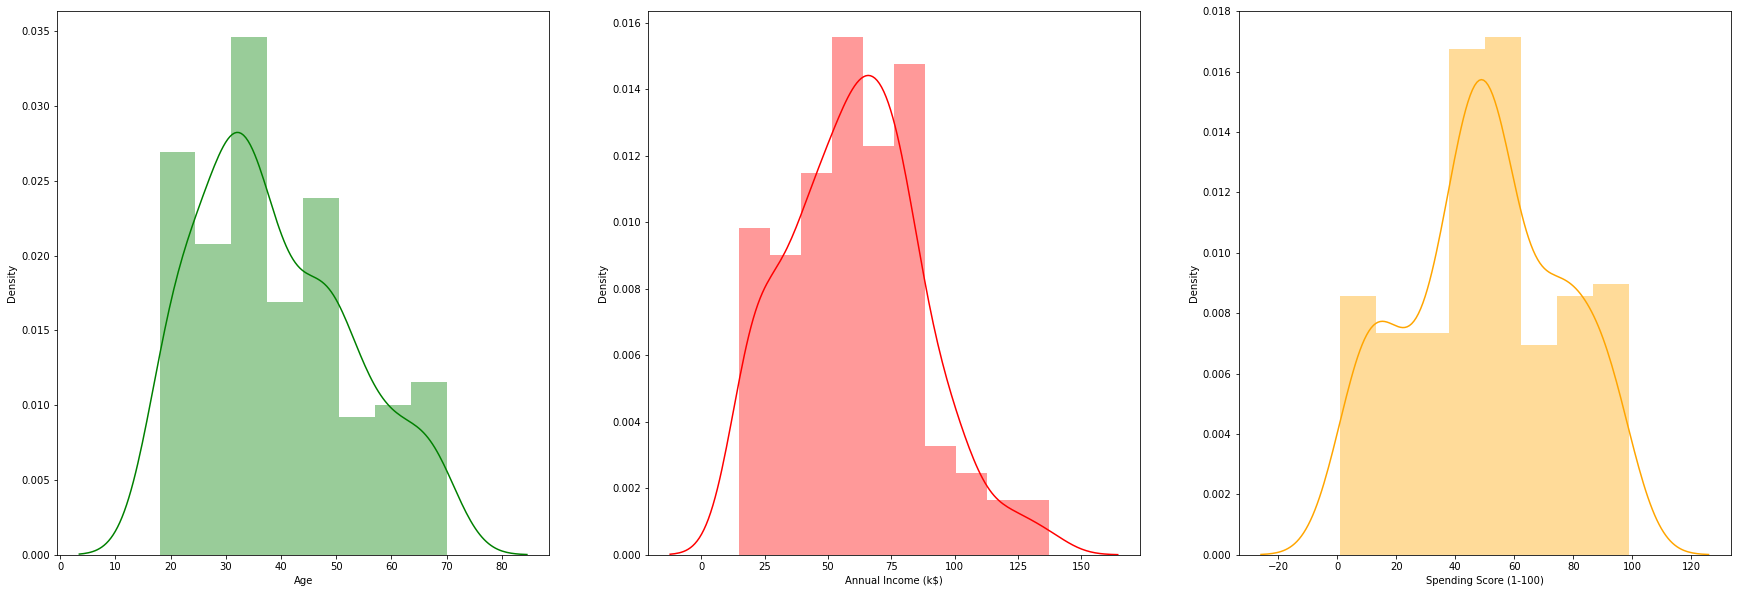

In [8]:
df1 = df.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]

f, axes = plt.subplots(1, 3, figsize=(30,10))

sns.distplot(df1["Age"],color = "green", ax=axes[0])
sns.distplot(df1["Annual Income (k$)"], color = "red", ax=axes[1])
sns.distplot(df1["Spending Score (1-100)"], color = "orange", ax=axes[2])
plt.show();

La distribución de _spending score_ se aproxima a una distribución normal dado que el spending score "normaliza" la distribución.

La gente de **alrededor de 30 años** es con diferencia la que más visita el _shopping mall_.

La gente que gasta **50k y 60k** son los que más gastan en la visita al _shopping mall_.

/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Eduardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

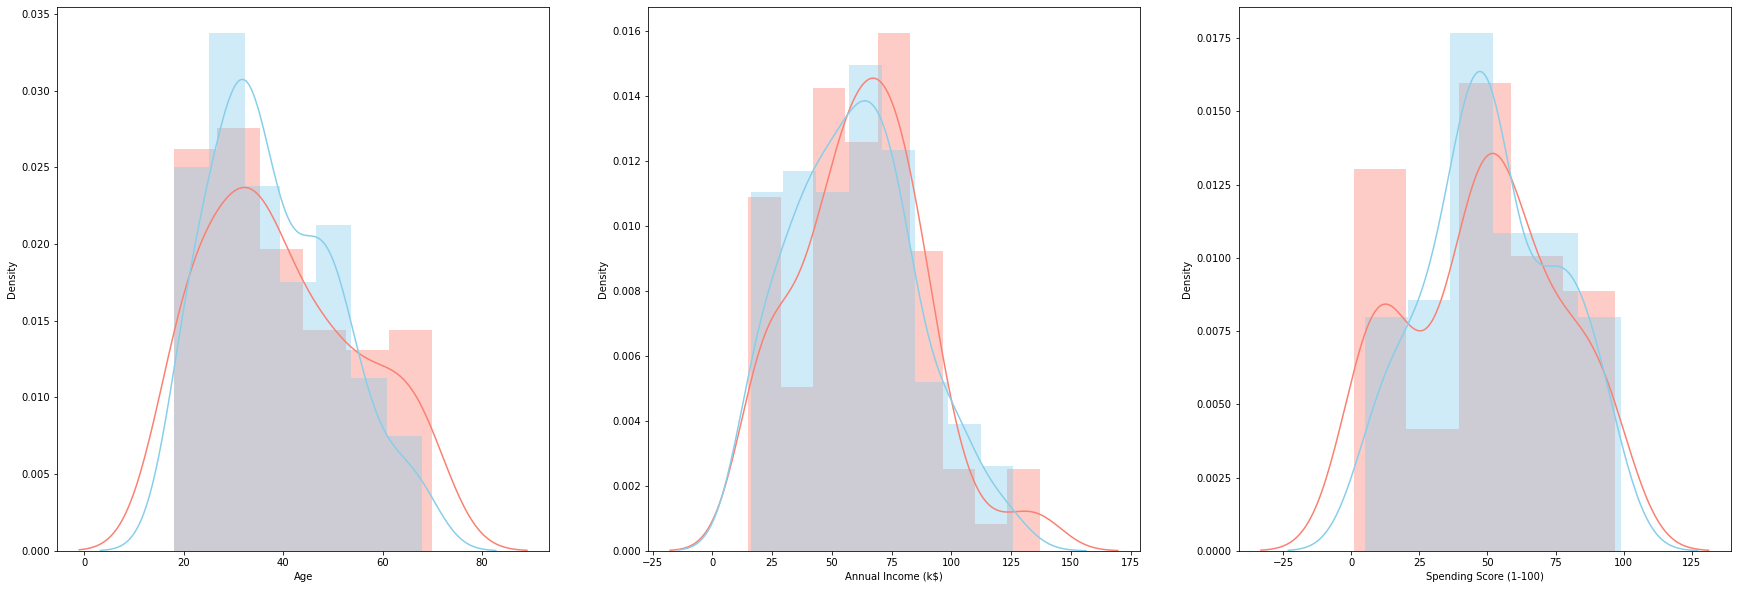

In [9]:
df1 = df.loc[:,["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
f, axes = plt.subplots(1, 3, figsize=(30,10))
sns.distplot(df1[df1["Gender"]=="Male"]["Age"],color = "salmon", ax=axes[0])
sns.distplot(df1[df1["Gender"]=="Female"]["Age"],color = "skyblue", ax=axes[0])
sns.distplot(df1[df1["Gender"]=="Male"]["Annual Income (k$)"], color = "salmon", ax=axes[1])
sns.distplot(df1[df1["Gender"]=="Female"]["Annual Income (k$)"], color = "skyblue", ax=axes[1])
sns.distplot(df1[df1["Gender"]=="Male"]["Spending Score (1-100)"], color = "salmon", ax=axes[2])
sns.distplot(df1[df1["Gender"]=="Female"]["Spending Score (1-100)"], color = "skyblue", ax=axes[2])
plt.show()

**Diagrama de dispersión por género**

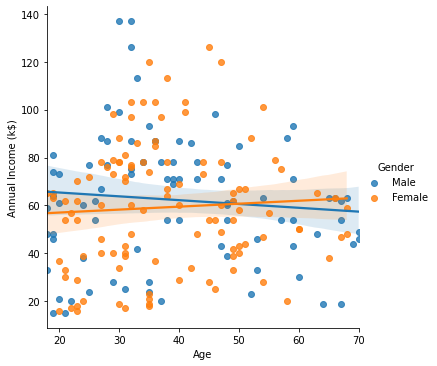

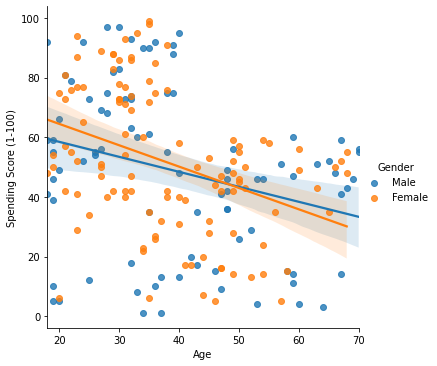

In [10]:
sns.lmplot(x='Age', y="Annual Income (k$)", hue='Gender', data=df, fit_reg=True)

sns.lmplot(x='Age', y="Spending Score (1-100)", hue='Gender', data=df, fit_reg=True);

**Clusterización/segmentación**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

x_k=df['Annual Income (k$)'].values
y_k=df['Spending Score (1-100)'].values

x_k2=list(zip(x_k,y_k))
x_k2=np.array(x_k2)

model=KMeans(n_clusters=5)
model.fit(x_k2) 

label=model.labels_

unique_labels = set(model.labels_)

**Visualizar clusters y centroides**

In [12]:
df["Cluster"] = label

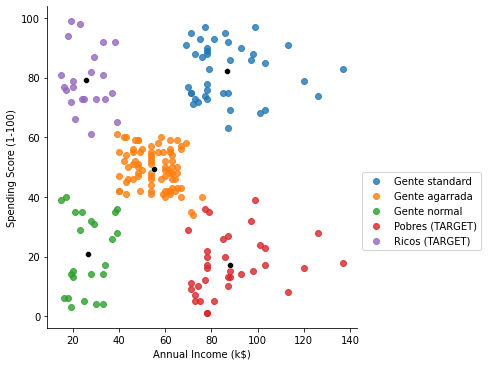

In [13]:
#Clusters
sns.lmplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue = "Cluster" , data = df, fit_reg=False,legend=False)

#Centroides
pl = sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1],color = "black", legend=False)

#Leyenda
leyenda = ['Gente standard','Gente agarrada','Gente normal','Pobres (TARGET)','Ricos (TARGET)']
pl.legend(leyenda)
pl.legend(leyenda,loc="best",bbox_to_anchor=(1, 0.5));

**Modelo de entrenamiento supervisado**

In [14]:
df_clusters = df["Cluster"]
df_features = df.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]

Convertimos las variables de la columna **Learning** a variables _dummy_ en la columna **Dummy**.

In [15]:
df["Dummy"]= np.nan

df["Dummy"]= df["Gender"]

df['Dummy'].replace(
    to_replace=["Male","Female"],
    value=[0,1],
    inplace=True)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Dummy
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,2,1
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,2,1


Separamos en un test size del 25% y un train size del 75%

In [16]:
df_features = df.loc[:,["Dummy","Age","Annual Income (k$)","Spending Score (1-100)"]]
x_train, x_test, y_train, y_test = train_test_split(df_features, df_clusters, random_state=0, test_size=0.25)
model.fit(x_train,y_train)

KMeans(n_clusters=5)

**Regresión logística**

In [17]:
logistic = linear_model.LogisticRegression(solver="newton-cg")

fitted_model = logistic.fit(x_train,y_train)

prediction_result = logistic.predict([[1,60,30,90]]) 

print(prediction_result)

[4]


**Accuracy score**

In [18]:
prediction_result = logistic.predict(x_test)

accuracy_score(y_test,prediction_result)

0.96

**Scatterplot del testeo y predicciones**

<ipython-input-19-ed194b5507ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Cluster"]=prediction_result


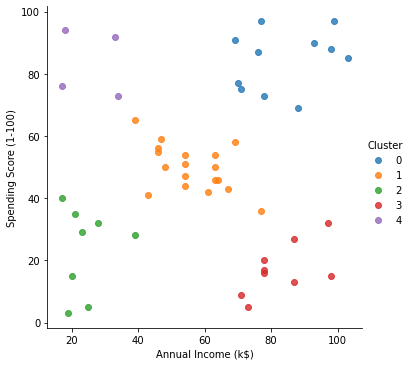

In [19]:
x_test["Cluster"]=prediction_result
sns.lmplot(x="Annual Income (k$)", y="Spending Score (1-100)",data=x_test, hue = "Cluster",fit_reg=False);